## Bild laden und anzeigen

0 50


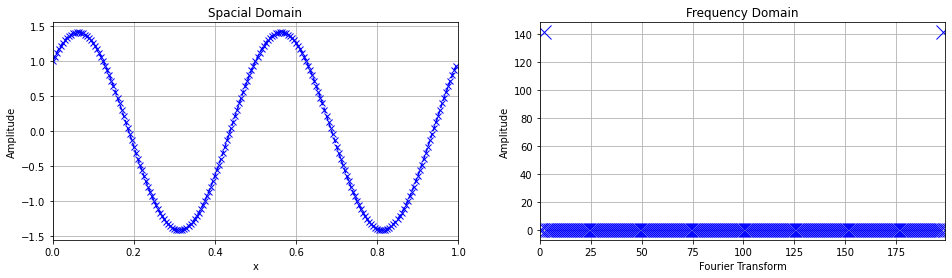

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size

def plotSignalAndFt(t,signal,fs):
    ''' Plots the input signal and the fourier transformed signal with respect to the time. 
          t: time
          signal: input signal
          fs: fourier transformed signal'''
    plt.figure(figsize=(16, 4))
    sp1 = plt.subplot(121)
    sp1.set_xlim(0,1)
    sp1.grid(True)
    sp1.set_xlabel('x')
    sp1.set_ylabel('Amplitude')
    sp1.set_title('Spacial Domain')
    sp1.plot(t,signal, 'bx--', markersize=6)
    
    sp2 = plt.subplot(122)
    sp2.set_xlabel('Fourier Transform')
    sp2.set_ylabel('Amplitude')
    sp2.set_title('Frequency Domain')
    sp2.grid(True)
    fftLength = np.array(fs.shape);
    sp2.set_xlim(0,fftLength-1)
    sp2.plot(np.arange(fftLength) ,abs(fs), 'bx', markersize=14)
    plt.show()
    
def fourier_transform(signal):


    # n = len(signal)
    # fft = np.zeros(20, dtype='complex_')
    # fourieh = 0 + 0j
    # l = np.arange(n) 
    # k = np.arange(n).reshape(n,1)
    # kl = k * l
    
    # complex = np.exp(-2 * np.pi * 1j * kl / n)
    # for l in range (n):
    #     fourieh = 0 + 0j
    #     for k in range (n):
    #         fourieh = fourieh + signal[k] * complex[k][l]
    #     fft[l] = fourieh  
        
    # return fft
    

    ####################'Alternativ'#################################
    n = len(signal)
    l = np.arange(n) #(1,3)
    k = np.arange(n).reshape((n,1)) #(3,1)
    kl = k*l
    complex_teil = np.exp(-2 * np.pi * 1j * kl / n)
    #matmul alternativ @
    return np.matmul(signal,complex_teil)
    ####################'Alternativ'#################################
    
def fft_vorlesung(f):
    n = f.size
    c = np.zeros(n,dtype='complex_')
    for k in range(n):
        #statt l => np.arange(n)
        c[k] = np.sum(f*np.exp((-2 * np.pi * 1j * k*(np.arange(n))) / n))
    return c

def ifft_vorlesung(c):
    n = len (c)
    f = np.zeros(n,dtype='complex_')
    for l in range (n):
        f[l] = np.sum(c[l]*(np.exp(2*np.pi*1j* l*(np.arange(n)))))
    return f


def func ( n ,k) :
    a = np.linspace (0.2*np.pi,n,endpoint = False)
    eingabe = np.cos(k*a)
    y = np.fft.fft( eingabe )
    print ( np.where(np.abs(y)>0.1) )


def func1 ( c1 ,c2) :
    for n in range(100):
        for k in range (100) :
            a = np.linspace (0.2*np.pi,n,endpoint = False)
            eingabe = np.cos(k*a)
            y = np.fft.fft( eingabe )
            b = np.where(np.abs(y)>0.1)
            if ( b[0][0]== c1 and b[0][1]== c2 ):
                print (n, k)
def main():
    n = 200
    t = np.arange(n)/ n
    f = np.sin(4* np.pi* t)+ np.cos(4 * np.pi* t)
    
    # # Apply Fourier Transformation
    fs = fft_vorlesung(f)
    func1(5,45)
    # # Plot Result
    plotSignalAndFt(t,f,fs)
    
    # n = 10
    # t = np.arange(n)/ n
    # f = np.sin(2 * np.pi* t)+np.sin(4 * np.pi* t) 
    # fs = np.fft.fft(f)
    # fss = np.fft.fftshift(fs)
    # plotSignalAndFt(t,f,fs)
    # plotSignalAndFt(t,f,fss) 
    
    
if __name__ == "__main__":
    main()

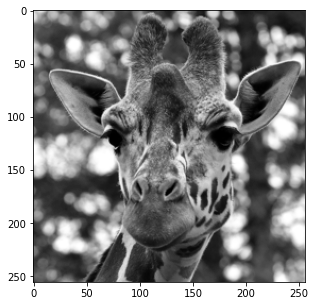

In [481]:
import numpy as np
import matplotlib.pylab as pltmorphologische
from PIL import Image
img_dir="giraffe.jpg"
img_pil=Image.open(img_dir)
img=np.array(img_pil.resize([256,256]))/255
img= (img[:,:,0] + img[:,:,1] + img[:,:,2])/3   
plt.figure(figsize=(5,5))
plt.imshow(img, 'gray')
plt.show()

## Fourier Transformation ausrechnen und anzeigen
Das Anzeigen geschieht in diesem Fall durch Ausrechnen des Absolutbetrages und Logarithmieren. Zu beachten ist, dass ein Shift durchgeführt wurde, sodass die niedrigste Frequenz in der Mitte ist.

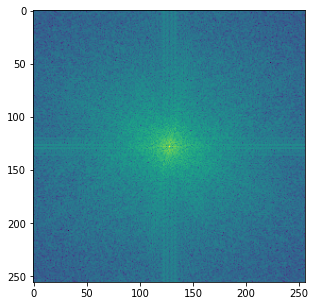

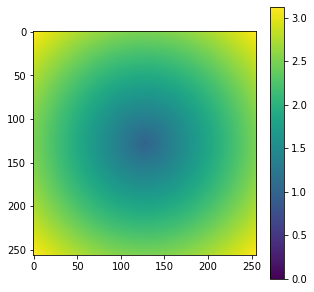

In [482]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(5,5))
plt.imshow(np.log(np.absolute(img_fft)))
plt.show()

ny, nx = img.shape
x = np.linspace(-1.5, 1.5, nx)
y = np.linspace(-1.5, 1.5, ny)
xv, yv = np.meshgrid(x, y)
mask = 1+ np.sqrt(xv**2 + yv**2)
plt.figure(figsize=(5,5))
plt.imshow(mask, vmin=0, vmax=np.amax(mask))
#plt.imshow(yv)
plt.colorbar()
plt.show()

## Manipulieren der FFT

Hier können wir kreativ werden, z.B. anheben der hohen Frequenzen

### Zunächst erstellen wir eine Maske mit der wir die FFT Koeffizienten multiplizieren möchten

### Dann multiplizieren wir, machen den Shift rückgängig und transformieren zurück

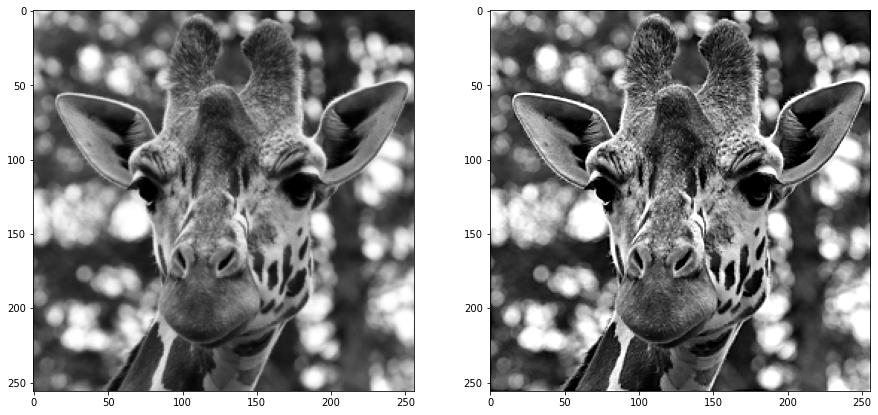

In [483]:
img_fft_manipulated = mask*img_fft
img_new = np.real(np.fft.ifft2(np.fft.ifftshift(img_fft_manipulated)))
plt.figure(figsize=(15,10))
sp1 = plt.subplot(121)
sp1.imshow(img, 'gray', vmin=0, vmax=1)
sp2 = plt.subplot(122)
sp2.imshow(img_new, 'gray', vmin=0, vmax=1)
plt.show()

# Der Faltungssatz

Wir illustrieren nun, dass der Faltungssatz tatsächlich stimmt :-)

/tmp/ipykernel_33834/4220537481.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mid_y = np.int(np.floor(ny/2.0))
/tmp/ipykernel_33834/4220537481.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; 

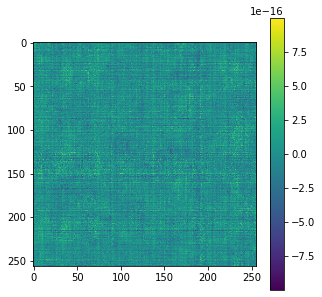

In [484]:
from scipy import signal
def convolution_via_fft(x,y):
    fft_x = np.fft.fft2(x)
    fft_y = np.fft.fft2(y)
    return np.fft.ifft2(fft_x*fft_y)

kernel = np.array([[0, -1.0, 0], [-1.0, 8.0, -1.0], [0, -1.0, 0]])/4
kernelBig = np.zeros([ny,nx])
mid_y = np.int(np.floor(ny/2.0))
mid_x = np.int(np.floor(nx/2.0))
kernelBig[mid_y-1:mid_y+2, mid_x-1:mid_x+2] = kernel
kernelBig = np.fft.ifftshift(kernelBig)
sharpened1 = signal.convolve2d(img, kernel, boundary='wrap', mode='same')
sharpened2 = np.real(convolution_via_fft(img,kernelBig))

plt.figure(figsize=(5,5))
plt.imshow(sharpened2-sharpened1)
plt.colorbar()
plt.show()


### Lösen linearer Faltungsgleichungen mittels FFT
Oder einmal anders herum, wie würden wir folgendes Problem lösen: Gegeben "sharpended1" und "kernel", sowie die Information, dass das Bild "sharpened" durch Faltung von einem Bild "img" mit "kernel" entstanden ist, wie bestimmen wir "img"?

/tmp/ipykernel_33834/4183997383.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mid_y = np.int(np.floor(ny/2.0))
/tmp/ipykernel_33834/4183997383.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

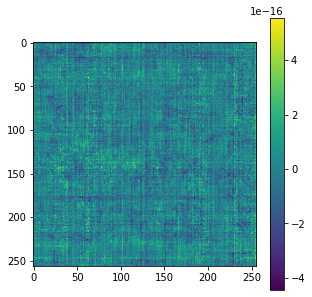

In [485]:
ny, nx = sharpened1.shape
kernelBig = np.zeros([ny,nx])
mid_y = np.int(np.floor(ny/2.0))
mid_x = np.int(np.floor(nx/2.0))
kernelBig[mid_y-1:mid_y+2, mid_x-1:mid_x+2] = kernel
kernelBig = np.fft.ifftshift(kernelBig)
fft_sharpened1 = np.fft.fft2(sharpened1)
fft_kernelBig = np.fft.fft2(kernelBig)
recoveredImg = np.real(np.fft.ifft2(fft_sharpened1/fft_kernelBig))

plt.figure(figsize=(5,5))
plt.imshow(img-recoveredImg)
plt.colorbar()
plt.show()
